In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls

In [2]:
%%latex
Redoing Bayes Take 7 06282019 in order to test the functionality of the new normalizing step in the likelihood 
function. Starts with forward calculations first before doing a Bayesian approach.

<IPython.core.display.Latex object>

In [3]:
r = 2.2439608235145855e-09    # in meters
diameter = r * 2
mean = diameter - 3e-9
sigma = 2e-10
c = 1
d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, mean, sigma, c)

In [4]:
m = 20
# c is already defined
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [5]:
theta_input = np.append(f_1, beta)

In [6]:
simulated_data = dls.g2(theta_input, d, m, gamma, time_in)

In [7]:
dls.log_prior(theta_input, m)

-1.7291521892550387e+18

In [8]:
dls.log_likelihood(theta_input, d, simulated_data, m, gamma, time_in)

-0.0

In [9]:
dls.log_posterior(theta_input, d, simulated_data, m, gamma, time_in)

-1.7291521892550387e+18

In [10]:
%%latex
Forward calculations are go. Now we will check using a bayesian inference.

<IPython.core.display.Latex object>

In [11]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [12]:
start_pos = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [13]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [14]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


array([0.372     , 0.363     , 0.35433333, 0.36933333, 0.35133333,
       0.359     , 0.345     , 0.34766667, 0.346     , 0.35933333,
       0.35566667, 0.36      , 0.36933333, 0.345     , 0.38133333,
       0.353     , 0.34933333, 0.35566667, 0.35666667, 0.36666667,
       0.36066667, 0.367     , 0.356     , 0.34933333, 0.357     ,
       0.36366667, 0.35933333, 0.371     , 0.373     , 0.36433333,
       0.36266667, 0.36133333, 0.353     , 0.37333333, 0.36533333,
       0.36166667, 0.35433333, 0.35533333, 0.36166667, 0.35533333,
       0.35933333, 0.36833333, 0.35933333, 0.36033333, 0.351     ,
       0.35633333, 0.34866667, 0.35733333, 0.34933333, 0.36166667,
       0.37433333, 0.369     , 0.36266667, 0.35633333, 0.36833333,
       0.35466667, 0.345     , 0.36566667, 0.36033333, 0.362     ,
       0.37      , 0.352     , 0.36966667, 0.34633333, 0.36533333,
       0.34966667, 0.36866667, 0.36266667, 0.361     , 0.36533333,
       0.35833333, 0.35733333, 0.36733333, 0.36966667, 0.35833

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

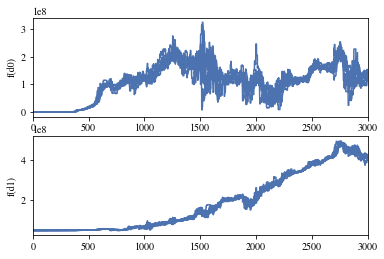

In [15]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

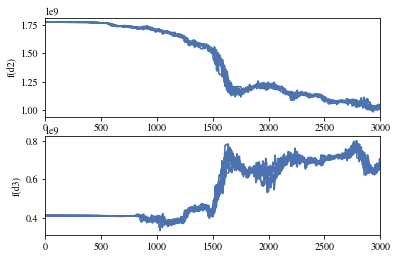

In [16]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)

In [19]:
samples = sampler.chain[:,2800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [20]:
q

,f(d0),f(d1),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19)
0.16,1.057322e+08,4.170998e+08,1.017412e+09,6.479223e+08,4.071718e+08,1.241221e+07,1.648664e+07,2.649124e+08,1.100224e+07,1.826536e+08,4.512725e+08,9.003124e+07,4.433981e+08,2.077908e+07,5.700153e+08,2.097016e+07,4.451702e+08,9.651544e+08,6.819765e+08,7.159604e+08
0.50,1.250619e+08,4.381935e+08,1.039907e+09,6.708338e+08,4.647494e+08,1.624780e+07,4.328068e+07,3.474337e+08,3.147997e+07,2.063436e+08,4.731776e+08,1.332796e+08,4.626314e+08,5.390670e+07,6.043825e+08,6.875853e+07,5.020821e+08,1.001532e+09,7.273980e+08,7.705090e+08
0.84,1.456191e+08,4.527560e+08,1.064107e+09,7.417687e+08,5.055369e+08,2.788359e+07,6.349548e+07,3.821568e+08,5.567266e+07,2.269011e+08,4.995548e+08,1.872737e+08,4.769449e+08,1.321529e+08,7.006576e+08,1.168628e+08,5.723820e+08,1.038942e+09,7.652225e+08,8.351421e+08


In [21]:
fifty_q = np.zeros(20)
fifty_q[0] = 1.251e8
fifty_q[1] = 4.382e8
fifty_q[2] = 1.04e9
fifty_q[3] = 6.71e8
fifty_q[4] = 4.647e8
fifty_q[5] = 1.624e7
fifty_q[6] = 4.328e7
fifty_q[7] = 3.474e8
fifty_q[8] = 3.148e7
fifty_q[9] = 2.0634e8
fifty_q[10] = 4.732e8
fifty_q[11] = 1.332e8
fifty_q[12] = 4.63e8
fifty_q[13] = 5.391e7
fifty_q[14] = 6.044e8
fifty_q[15] = 6.875e7
fifty_q[16] = 5.021e8
fifty_q[17] = 1.001e9
fifty_q[18] = 7.274e8
fifty_q[19] = 7.71e8

Text(0.5, 1.0, 'Inferred Distribution')

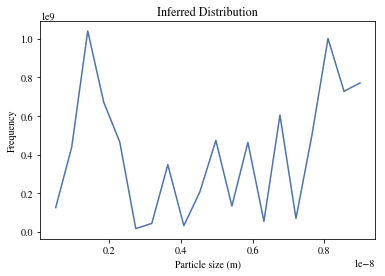

In [23]:
plt.plot(d, fifty_q)
plt.xlabel('Particle size (m)')
plt.ylabel('Frequency')
plt.title('Inferred Distribution')

In [25]:
beta_16 = 0.84
beta_50 = 1.186
beta_84 = 1.496

In [26]:
%%latex
The inferred distribution with 3000 steps is extremely spikey which is very bad. So let's go back and revisit the g2 implementation
and check to see if we can move the normalization step outside of the loop

<IPython.core.display.Latex object>

In [27]:
import dlsfunctions as dls

In [31]:
nsteps2 = 4000

In [32]:
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, simulated_data, m, gamma, time_in))

In [ ]:
result = sampler.run_mcmc(start_pos, nsteps2)
sampler.acceptance_fraction

/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/home/tle3/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` func

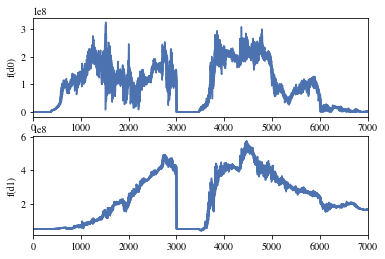

In [30]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)


In [ ]:
samples = sampler.chain[:,2800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)